# Game's data Analysis\
Data description\
—Name\
—Platform\
—Year_of_Release\
—Genre\
—NA_sales (North American sales in USD million)\
—EU_sales (sales in Europe in USD million)\
—JP_sales (sales in Japan in USD million)\
—Other_sales (sales in other countries in USD million)\
—Critic_Score (maximum of 100)\
—User_Score (maximum of 10)\
—Rating (ESRB)\
**The goal is to analyse the sales on different Game platforms. To see the influence of scores on the revenue. To find out the most proffitable genres**

In [1]:
!pip install -Uq sidetable --user

In [2]:
!pip install -Uq seaborn --user

In [3]:
!pip install -Uq matplotlib --user

In [4]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import pandas as pd 
import numpy as np
import sidetable
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
try:
    games_data = pd.read_csv('/datasets/games.csv')
except IOError as e:
    print(e)


In [7]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are 16715 rows and 11 columns in our data. It is already obvious that there is a lot of missing data in the rating, user and critic score. Also the year of release has float data type, it is better to change the type to int and the user_score is object, which we should change too.

In [8]:
games_data.describe(include='all')

Name Platform  Year_of_Release   Genre  \
count                         16713    16715     16446.000000   16713   
unique                        11559       31              NaN      12   
top     Need for Speed: Most Wanted      PS2              NaN  Action   
freq                             12     2161              NaN    3369   
mean                            NaN      NaN      2006.484616     NaN   
std                             NaN      NaN         5.877050     NaN   
min                             NaN      NaN      1980.000000     NaN   
25%                             NaN      NaN      2003.000000     NaN   
50%                             NaN      NaN      2007.000000     NaN   
75%                             NaN      NaN      2010.000000     NaN   
max                             NaN      NaN      2016.000000     NaN   

            NA_sales      EU_sales      JP_sales   Other_sales  Critic_Score  \
count   16715.000000  16715.000000  16715.000000  16715.000000   8137.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.263377      0.145060      0.077617      0.047342     68.967679   
std         0.813604      0.503339      0.308853      0.186731     13.938165   
min         0.000000      0.000000      0.000000      0.000000     13.000000   
25%         0.000000      0.000000      0.000000      0.000000     60.000000   
50%         0.080000      0.020000      0.000000      0.010000     71.000000   
75%         0.240000      0.110000      0.040000      0.030000     79.000000   
max        41.360000     28.960000     10.220000     10.570000     98.000000   

       User_Score Rating  
count       10014   9949  
unique         96      8  
top           tbd      E  
freq         2424   3990  
mean          NaN    NaN  
std           NaN    NaN  
min           NaN    NaN  
25%           NaN    NaN  
50%           NaN    NaN  
75%           NaN    NaN  
max           NaN    NaN

In our data there 31 plarforms, the most popular one is PS2, there are 12 types of games genres, the top is action, and the most often mentioned game is "Need for Speed: Most Wanted". The oldest year of release is 1980 and the most fresh game was released in 2016.

In [9]:
games_data.stb.missing(style=True)

Here is shown that critic score has 51% missing and rating and user score 40% missing. 

In [10]:
games_data.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [11]:
games_data.columns = games_data.columns.str.lower()

In [12]:
games_data.dropna(subset=['year_of_release'],inplace=True)

As the precent of missing years is really small (1,61%) and we can't fill it for sure it is possible to drop this data. It won't change the data very much

In [13]:
games_data['year_of_release'].isnull().value_counts()

False    16446
Name: year_of_release, dtype: int64

In [14]:
games_data['year_of_release'] = games_data['year_of_release'].astype(int)

In [15]:
games_data['name'].isnull().value_counts()

False    16444
True         2
Name: name, dtype: int64

There are 2 rows with missing games' names, them should be dropped of.

In [16]:
games_data.dropna(subset=['name'],inplace=True)

In [17]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Now the problems in scores and rating are left.

In [18]:
games_data[games_data['critic_score'].isnull()]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1         29.08      3.58      6.81         0.77           NaN        NaN   
4         11.27      8.89     10.22         1.00           NaN        NaN   
5         23.20      2.26      4.22         0.58           NaN        NaN   
9         26.93      0.63      0.28         0.47           NaN        NaN   
10         9.05     10.95      1.93         2.74           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[8461 rows x 11 columns]

In [19]:
games_data['rating'].describe()

count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object

In [20]:
games_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [21]:
games_data['rating'].isnull().value_counts()

False    9768
True     6676
Name: rating, dtype: int64

There are 8 types of ratings in our database, as we need the rating in the further analysis we can try to fix this missing values. We can take the mode rating for the particular games' names and fill the missing values with these values.

In [22]:
games_data['rating'] = games_data.groupby('name')['rating'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "unknown")).reset_index(drop=True)


In [23]:
games_data['rating'].isnull().value_counts()

False    16176
True       268
Name: rating, dtype: int64

The rating column has 268 rows of missing data and we can't just get rid of it, there is no obvious connection between rating and scores, so we can replace the missing value with unknown.

In [24]:
games_data['rating'].fillna("unknown", inplace = True) 

In [25]:
games_data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [26]:
games_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [27]:
games_data[games_data['user_score']=='tbd']['year_of_release'].value_counts()

2009    405
2010    331
2008    326
2011    217
2007    192
2002    192
2006    124
2005    121
2004    107
2003     95
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

It is important to understand what is the 'tbd' score, from the first sight it might be thought that it is for a new game which doesn't yet has a user_score, but as it is seen from the table above, the user score is also to be determined in the games starting from 1997. We can't just put a mean or median score, it is not going to show us the real score situation. It can be handled as missing values, so it can be changed to a "0" user score

In [28]:
games_data.loc[games_data['user_score'] =='tbd', 'user_score'] = 0

In [29]:
games_data['user_score'] = games_data['user_score'].astype(float, errors = 'raise')

In [30]:
games_data[games_data['user_score'].isnull()]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1         29.08      3.58      6.81         0.77           NaN         NaN   
4         11.27      8.89     10.22         1.00           NaN         NaN   
5         23.20      2.26      4.22         0.58           NaN         NaN   
9         26.93      0.63      0.28         0.47           NaN         NaN   
10         9.05     10.95      1.93         2.74           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  
1      unknown  
4      unknown  
5      unknown  
9      unknown  
10     unknown  
...        ...  
16710  unknown  
16711  unknown  
16712  unknown  
16713  unknown  
16714  unknown  

[6605 rows x 11 columns]

In [31]:
rating_df = games_data.groupby('rating')[['user_score']].median().sort_values(by='user_score').reset_index(drop=False)
print(rating_df)
games_data.stb.freq(['rating'],style=True, cum_cols=False)

    rating  user_score
0       AO         4.1
1       EC         6.5
2  unknown         6.7
3        E         6.8
4     E10+         6.9
5        T         7.0
6        M         7.2
7       RP         8.1
8      K-A         8.4


Trere are still a lot of rows with mising score, I would like to understand the median score of the data, grouped by platform and name, as we have some rows where only critic or only user score is missing. So if we find a connection between 2 columns, we will probably be able to fill in some score rows.

In [32]:
games_data_critic = games_data.groupby(['platform','name'])['critic_score'].median().reset_index()

In [33]:
games_data_critic.head()

platform                name  critic_score
0     2600        Action Force           NaN
1     2600  Adventures of Tron           NaN
2     2600            Air Raid           NaN
3     2600             Airlock           NaN
4     2600               Alien           NaN

In [34]:
games_data_user = games_data.groupby(['platform','name'])['user_score'].median().reset_index()

In [35]:
games_data_user.head()

platform                name  user_score
0     2600        Action Force         NaN
1     2600  Adventures of Tron         NaN
2     2600            Air Raid         NaN
3     2600             Airlock         NaN
4     2600               Alien         NaN

In [36]:
games_data_scores = pd.merge(games_data_critic, games_data_user, on=['platform', 'name'], how="outer")
games_data_scores

platform                        name  critic_score  user_score
0         2600                Action Force           NaN         NaN
1         2600          Adventures of Tron           NaN         NaN
2         2600                    Air Raid           NaN         NaN
3         2600                     Airlock           NaN         NaN
4         2600                       Alien           NaN         NaN
...        ...                         ...           ...         ...
16436     XOne                      XCOM 2          87.0         8.1
16437     XOne                      ZombiU           NaN         NaN
16438     XOne         Zombie Army Trilogy          62.0         7.2
16439     XOne           Zoo Tycoon (2013)           NaN         NaN
16440     XOne  Zumba Fitness: World Party          73.0         6.2

[16441 rows x 4 columns]

In [37]:
score_ratio = (games_data_scores['critic_score'] / games_data_scores['user_score']).median()
score_ratio

10.0

There is some correlation between user_score and critic_score, if we use median value  - it is 10, we can fill in some missing values using this ratio

In [38]:
games_data[(games_data['user_score'].isna()) & (~games_data['critic_score'].isna())].head()

name platform  year_of_release       genre  \
182                    Tomb Raider II       PS             1997      Action   
440   Need for Speed III: Hot Pursuit       PS             1998      Racing   
637         Riven: The Sequel to Myst       PC             1997   Adventure   
1981                Monster Rancher 2       PS             1998  Simulation   
2195                MVP Baseball 2005       XB             2005      Sports   

      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
182       2.30      2.46      0.20         0.28          85.0         NaN   
440       2.14      0.86      0.00         0.13          88.0         NaN   
637       1.52      0.82      0.00         0.10          83.0         NaN   
1981      0.19      0.13      0.66         0.07          83.0         NaN   
2195      0.70      0.20      0.00         0.03          86.0         NaN   

       rating  
182         T  
440         E  
637   unknown  
1981        E  
2195        T

In [39]:
games_data[(~games_data['user_score'].isna()) & (games_data['critic_score'].isna())].head()

name platform  year_of_release    genre  \
119                   Zumba Fitness      Wii             2010   Sports   
255  Call of Duty: Advanced Warfare      PS3             2014  Shooter   
263  Call of Duty: Advanced Warfare     X360             2014  Shooter   
264                         FIFA 15      PS3             2014   Sports   
291   World Soccer Winning Eleven 9      PS2             2005   Sports   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
119      3.45      2.59      0.00         0.66           NaN         0.0   
255      1.56      1.93      0.19         0.68           NaN         4.8   
263      2.77      1.11      0.00         0.40           NaN         4.9   
264      0.58      3.02      0.04         0.64           NaN         4.5   
291      0.12      2.26      0.90         0.77           NaN         8.2   

    rating  
119      E  
255      M  
263      E  
264      M  
291      M

In [40]:
games_data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [41]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [42]:
games_data.loc[(games_data['critic_score'].isna()) & (~games_data['user_score'].isna()), 'critic_score'] = games_data['user_score'].mul(score_ratio.astype(int))
games_data.loc[(games_data['user_score'].isna()) & (~games_data['critic_score'].isna()), 'user_score'] = games_data['critic_score'] / score_ratio.astype(int)
                                     

In [43]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     9872 non-null   float64
 9   user_score       9872 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


In [44]:
games_data.stb.missing(style=True)

We see that the situation is improved. The critic scire didn't change a lot, but the user_score changed approximately 2600 rows. 

In [45]:
games_data.stb.freq(['platform'],style=True, cum_cols=False)

In our data frame we have 30 platforms, there are 2 leaders by mentioning -PS2 and DS, the most recent are TG16,PCFX,GG		

In [46]:
games_data.sample(10)

name platform  \
5162                                   Elite Beat Agents       DS   
13076                                  Air Traffic Chaos       DS   
10706  Nihon Keizai Shinbunsha Kanshuu: Shiranai Mama...       DS   
7209   Mary-Kate and Ashley: Sweet 16 - Licenced to D...      PS2   
5257                      Middle-Earth: Shadow of Mordor       PC   
13842      King of Fighters: Maximum Impact Regulation A      PS2   
13710                          Fashion Week Jr. Designer       DS   
14407                Dodge Racing: Charger vs Challenger       DS   
4923                                        Blood Omen 2      PS2   
2671                           Personal Trainer: Walking       DS   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
5162              2006        Misc      0.30      0.03      0.00         0.03   
13076             2007  Simulation      0.05      0.00      0.00         0.00   
10706             2009        Misc      0.00      0.00      0.10         0.00   
7209              2002        Misc      0.11      0.08      0.00         0.03   
5257              2014      Action      0.12      0.20      0.00         0.03   
13842             2007    Fighting      0.00      0.00      0.04         0.00   
13710             2009  Simulation      0.04      0.00      0.00         0.00   
14407             2009      Racing      0.03      0.00      0.00         0.00   
4923              2002      Action      0.19      0.15      0.00         0.05   
2671              2008      Sports      0.21      0.32      0.17         0.07   

       critic_score  user_score   rating  
5162           87.0         8.6  unknown  
13076          66.0         0.0  unknown  
10706           NaN         NaN  unknown  
7209            NaN         NaN        E  
5257           84.0         8.0        E  
13842           NaN         NaN     E10+  
13710           0.0         0.0        E  
14407           0.0         0.0        E  
4923           67.0         8.8        E  
2671           69.0         0.0        T

In [47]:
games_data.stb.freq(['name'],style=True, cum_cols=False)

The most famous game in our data is Need for Speed: Most Wanted

Now let's count the total sales of every paticular game.

In [49]:
games_data['total_sales']=games_data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
games_data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

As for largest total sales across all the data there are Wii sports leader,  who had twice more sales than the next leader - Super Mario Bros.

In [50]:
games_data.nlargest(5,['total_sales'])

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

However the sports game (G1 Jockey 4 2008) on PS3 platform didn't succed and had 0 sales. 

In [51]:
games_data.nsmallest(5,['total_sales'])

name platform  \
16676                                  G1 Jockey 4 2008      PS3   
16709  SCORE International Baja 1000: The Official Game      PS2   
15384                                      Order of War       PC   
15486                    Arslan: The Warriors of Legend     XOne   
15499                                 Motocross Mania 3       XB   

       year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  \
16676             2008    Sports      0.00      0.00       0.0          0.0   
16709             2008    Racing      0.00      0.00       0.0          0.0   
15384             2009  Strategy      0.00      0.01       0.0          0.0   
15486             2016    Action      0.01      0.00       0.0          0.0   
15499             2005    Racing      0.01      0.00       0.0          0.0   

       critic_score  user_score   rating  total_sales  
16676           NaN         NaN  unknown         0.00  
16709           NaN         NaN  unknown         0.00  
15384          69.0         7.3        M         0.01  
15486          58.0         5.8        M         0.01  
15499          38.0         3.6  unknown         0.01

## Analys of the data 	
    Firstly, it is important to see how many games were released in different years and how sales varied from platform to platform.
    
    Look at how many games were released in different years. Is the data for every period significant?
	Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
	Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

In [52]:
df = games_data[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
df                                                                               

year_of_release  name
0              1980     9
1              1981    46
2              1982    36
3              1983    17
4              1984    14
5              1985    14
6              1986    21
7              1987    16
8              1988    15
9              1989    17
10             1990    16
11             1991    41
12             1992    43
13             1993    60
14             1994   121
15             1995   219
16             1996   263
17             1997   289
18             1998   379
19             1999   338
20             2000   350
21             2001   482
22             2002   829
23             2003   775
24             2004   762
25             2005   939
26             2006  1006
27             2007  1197
28             2008  1427
29             2009  1426
30             2010  1255
31             2011  1136
32             2012   653
33             2013   544
34             2014   581
35             2015   606
36             2016   502

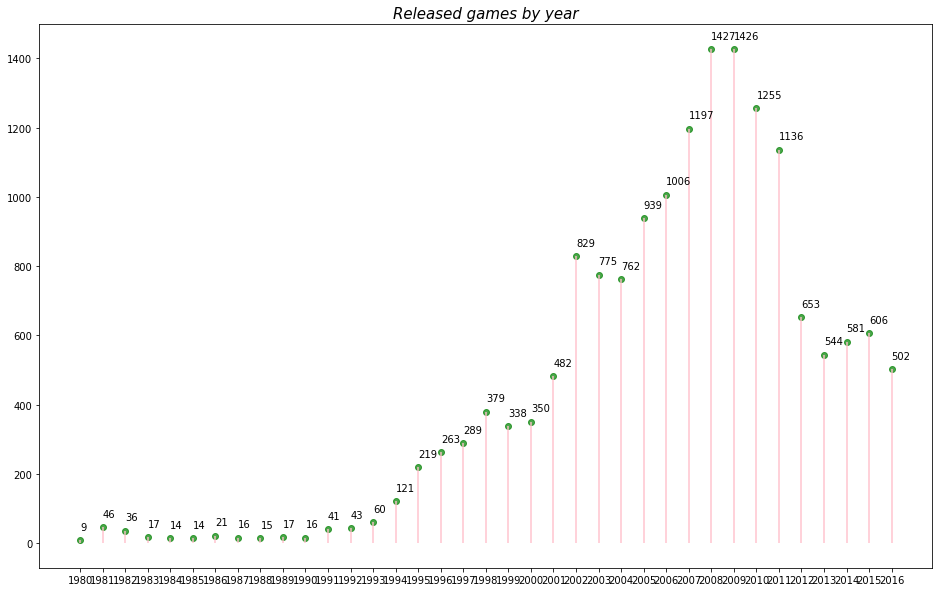

In [53]:
fig,ax=plt.subplots(figsize=(16,10))
ax.vlines(x=df['year_of_release'], ymin=0, ymax=df['name'], color='pink', alpha = 0.7, linewidth=2)
ax.scatter(x=df['year_of_release'], y=df['name'], color='green', alpha=0.7)

ax.set_title('Released games by year', fontstyle='italic', fontdict = {'size':15})
ax.set_ylabel = ('Number of games')
ax.set_xticks(df['year_of_release'])

for row in df.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name,2));

This lolipop chart indicates us that there sales from 1980 up to 2001 didn't grow fast, but than the boom started, the peak was in 2008 and 2009 and in 2011 the sales really decreased.Lets look how the sales change from platform to platform and find the platform with the greatest sales

In [54]:
df_1= games_data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
df_1.tail(10)

platform  total_sales
21      3DS       257.81
22      PSP       289.53
23      GBA       312.88
24      PS4       314.14
25       PS       727.58
26       DS       802.78
27      Wii       891.18
28      PS3       931.34
29     X360       961.24
30      PS2      1233.56

Again the PS2 is the real leader in the sales across the years, but lets see the z_score for all the platforms to check the distibution on all the platforms.

In [55]:
df_1['sales_z']=(df_1['total_sales'] - df_1['total_sales'].mean())/df_1['total_sales'].std()

In [56]:
df_1.head(10)

platform  total_sales   sales_z
0     PCFX         0.03 -0.826577
1       GG         0.04 -0.826548
2      3DO         0.10 -0.826373
3     TG16         0.16 -0.826199
4       WS         1.42 -0.822536
5       NG         1.44 -0.822477
6      SCD         1.86 -0.821256
7       DC        15.95 -0.780292
8      GEN        28.35 -0.744240
9      SAT        33.59 -0.729006

In [57]:
df_1['color']=['red' if x<0 else 'green' for x in df_1['sales_z']]
df_1.tail(10)

platform  total_sales   sales_z  color
21      3DS       257.81 -0.077116    red
22      PSP       289.53  0.015105  green
23      GBA       312.88  0.082992  green
24      PS4       314.14  0.086655  green
25       PS       727.58  1.288676  green
26       DS       802.78  1.507310  green
27      Wii       891.18  1.764321  green
28      PS3       931.34  1.881081  green
29     X360       961.24  1.968011  green
30      PS2      1233.56  2.759744  green

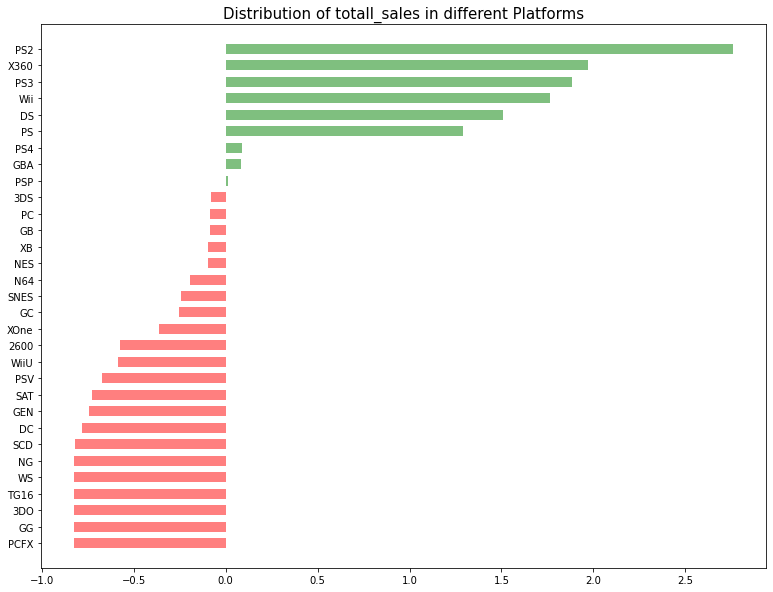

In [58]:
plt.figure(figsize=(13,10))
plt.hlines(y=df_1['platform'], xmax=df_1['sales_z'], xmin=0,color=df_1['color'], alpha=0.5, linewidth=10)
plt.title ('Distribution of totall_sales in different Platforms', fontdict={'size':15});

So here is the distribution for all platforms by total_sales. Now we found all the platfroms that had good sales and they are - PSP, GBA, PS4, PS, DS, Wii, PS3, X360, 3DS and PS2	

Now it is time to check the total_sales connecting to year of release and see what sales were for top platforms in particular years

In [59]:
platform_years = pd.pivot_table(games_data, values='total_sales', index=['year_of_release'], columns = ['platform'], aggfunc='sum',fill_value=0)
platform_years.tail(7)

platform         2600  3DO    3DS   DC     DS   GB  GBA   GC  GEN   GG  ...  \
year_of_release                                                         ...   
2010              0.0  0.0   0.00  0.0  85.02  0.0  0.0  0.0  0.0  0.0  ...   
2011              0.0  0.0  63.20  0.0  26.18  0.0  0.0  0.0  0.0  0.0  ...   
2012              0.0  0.0  51.36  0.0  11.01  0.0  0.0  0.0  0.0  0.0  ...   
2013              0.0  0.0  56.57  0.0   1.54  0.0  0.0  0.0  0.0  0.0  ...   
2014              0.0  0.0  43.76  0.0   0.00  0.0  0.0  0.0  0.0  0.0  ...   
2015              0.0  0.0  27.78  0.0   0.00  0.0  0.0  0.0  0.0  0.0  ...   
2016              0.0  0.0  15.14  0.0   0.00  0.0  0.0  0.0  0.0  0.0  ...   

platform         SAT  SCD  SNES  TG16   WS     Wii   WiiU    X360   XB   XOne  
year_of_release                                                                
2010             0.0  0.0   0.0   0.0  0.0  127.95   0.00  170.03  0.0   0.00  
2011             0.0  0.0   0.0   0.0  0.0   59.65   0.00  143.84  0.0   0.00  
2012             0.0  0.0   0.0   0.0  0.0   21.71  17.56   99.74  0.0   0.00  
2013             0.0  0.0   0.0   0.0  0.0    8.59  21.65   88.58  0.0  18.96  
2014             0.0  0.0   0.0   0.0  0.0    3.75  22.03   34.74  0.0  54.07  
2015             0.0  0.0   0.0   0.0  0.0    1.14  16.35   11.96  0.0  60.14  
2016             0.0  0.0   0.0   0.0  0.0    0.18   4.60    1.52  0.0  26.15  

[7 rows x 31 columns]

In [60]:
top_platforms = platform_years[["PSP", "PS4", "GBA", "PS", "DS", "Wii", "PS3", "X360", "PS2"]]
top_platforms.tail()

platform          PSP     PS4  GBA   PS     DS    Wii     PS3   X360  PS2
year_of_release                                                          
2012             7.69    0.00  0.0  0.0  11.01  21.71  107.36  99.74  0.0
2013             3.14   25.99  0.0  0.0   1.54   8.59  113.25  88.58  0.0
2014             0.24  100.00  0.0  0.0   0.00   3.75   47.76  34.74  0.0
2015             0.12  118.90  0.0  0.0   0.00   1.14   16.82  11.96  0.0
2016             0.00   69.25  0.0  0.0   0.00   0.18    3.60   1.52  0.0

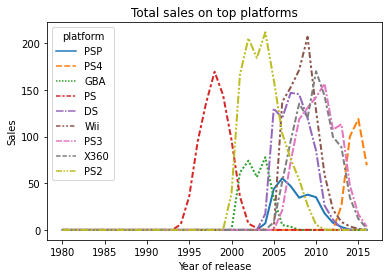

In [61]:
sns.lineplot(data=top_platforms,linewidth=2)
sns.set(rc = {'figure.figsize':(15,8)})
plt.xlabel("Year of release")
plt.ylabel("Sales")
plt.title("Total sales on top platforms");

It is seen from the lineplot, that the life of the platform with the growing sales are approximetely 3 years, most of them have their peak of sales after 3 years and after that the sales start to fail. So if it is needed to prognoze the sales of 2017, it is reasonable to take the period of years when the platforms were released starting from 2013. Now it is time to answer the question if the platform is growing or shrinking. We will use the data with the year of release more than 2000.

In [62]:
new_games_data = games_data[games_data['year_of_release']>=2000]
new_games_data

name platform  year_of_release       genre  \
0                         Wii Sports      Wii             2006      Sports   
2                     Mario Kart Wii      Wii             2008      Racing   
3                  Wii Sports Resort      Wii             2009      Sports   
6              New Super Mario Bros.       DS             2006    Platform   
7                           Wii Play      Wii             2006        Misc   
...                              ...      ...              ...         ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016      Action   
16711               LMA Manager 2007     X360             2006      Sports   
16712        Haitaka no Psychedelica      PSV             2016   Adventure   
16713               Spirits & Spells      GBA             2003    Platform   
16714            Winning Post 8 2016      PSV             2016  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
6         11.28      9.14      6.50         2.88          89.0         8.5   
7         13.96      9.18      2.93         2.84          58.0         6.6   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  total_sales  
0            E        82.54  
2            E        35.52  
3            E        32.77  
6            E        29.80  
7            E        28.91  
...        ...          ...  
16710  unknown         0.01  
16711  unknown         0.01  
16712  unknown         0.01  
16713  unknown         0.01  
16714  unknown         0.01  

[14470 rows x 12 columns]

In [63]:
df=pd.pivot_table(new_games_data, index=['year_of_release'], columns = ['platform'], values = ['total_sales'], aggfunc='sum', fill_value=0)
df.tail()

total_sales                                                   \
platform                3DS   DC     DS   GB  GBA   GC  N64     PC   PS  PS2   
year_of_release                                                                
2012                  51.36  0.0  11.01  0.0  0.0  0.0  0.0  23.22  0.0  0.0   
2013                  56.57  0.0   1.54  0.0  0.0  0.0  0.0  12.38  0.0  0.0   
2014                  43.76  0.0   0.00  0.0  0.0  0.0  0.0  13.28  0.0  0.0   
2015                  27.78  0.0   0.00  0.0  0.0  0.0  0.0   8.52  0.0  0.0   
2016                  15.14  0.0   0.00  0.0  0.0  0.0  0.0   5.25  0.0  0.0   

                                                                             \
platform            PS3     PS4   PSP    PSV   WS    Wii   WiiU   X360   XB   
year_of_release                                                               
2012             107.36    0.00  7.69  16.19  0.0  21.71  17.56  99.74  0.0   
2013             113.25   25.99  3.14  10.59  0.0   8.59  21.65  88.58  0.0   
2014              47.76  100.00  0.24  11.90  0.0   3.75  22.03  34.74  0.0   
2015              16.82  118.90  0.12   6.25  0.0   1.14  16.35  11.96  0.0   
2016               3.60   69.25  0.00   4.25  0.0   0.18   4.60   1.52  0.0   

                        
platform          XOne  
year_of_release         
2012              0.00  
2013             18.96  
2014             54.07  
2015             60.14  
2016             26.15

Here we find the dynamics of total sales by platform in different years. The negative dynamics display that the platform starts to shrink and the positive is for growing. 

In [64]:
dynamics=(df-df.shift(+1)).T
dynamics

year_of_release       2000    2001   2002   2003   2004    2005    2006  \
            platform                                                      
total_sales 3DS        NaN    0.00   0.00   0.00   0.00    0.00    0.00   
            DC         NaN   -4.92  -0.78  -0.29   0.00    0.00    0.00   
            DS         NaN    0.00   0.00   0.00  17.27  112.87  -10.33   
            GB         NaN  -10.52  -9.24   0.00   0.00    0.00    0.00   
            GBA        NaN   61.46  12.63 -17.49  21.24  -44.05  -28.58   
            GC         NaN   26.34  25.47  -1.20 -21.79   -1.20  -16.36   
            N64        NaN  -30.72  -3.17  -0.08   0.00    0.00    0.00   
            PC         NaN    0.81   3.10   0.27   1.55   -6.02   -1.52   
            PS         NaN  -60.78 -28.92  -4.60  -2.07    0.00    0.00   
            PS2        NaN  127.26  38.95 -21.07  27.50  -51.15  -57.24   
            PS3        NaN    0.00   0.00   0.00   0.00    0.00   20.96   
            PS4        NaN    0.00   0.00   0.00   0.00    0.00    0.00   
            PSP        NaN    0.00   0.00   0.00   7.06   36.78   11.48   
            PSV        NaN    0.00   0.00   0.00   0.00    0.00    0.00   
            WS         NaN   -0.40  -0.28   0.00   0.00    0.00    0.00   
            Wii        NaN    0.00   0.00   0.00   0.00    0.00  137.15   
            WiiU       NaN    0.00   0.00   0.00   0.00    0.00    0.00   
            X360       NaN    0.00   0.00   0.00   0.00    8.25   43.37   
            XB         NaN   21.27  25.75   7.03  10.38  -16.34  -39.04   
            XOne       NaN    0.00   0.00   0.00   0.00    0.00    0.00   

year_of_release        2007   2008   2009   2010   2011   2012   2013   2014  \
            platform                                                           
total_sales 3DS        0.00   0.00   0.00   0.00  63.20 -11.84   5.21 -12.81   
            DC         0.02   0.02  -0.04   0.00   0.00   0.00   0.00   0.00   
            DS        27.13  -1.63 -25.77 -34.52 -58.84 -15.17  -9.47  -1.54   
            GB         0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
            GBA       -1.88  -3.40   0.00   0.00   0.00   0.00   0.00   0.00   
            GC       -10.99  -0.27   0.00   0.00   0.00   0.00   0.00   0.00   
            N64        0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
            PC         6.43   3.14   4.49   7.37  10.75 -11.81 -10.84   0.90   
            PS         0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
            PS2      -27.43 -22.09 -27.50 -20.76  -5.19  -0.45   0.00   0.00   
            PS3       52.23  45.33  12.41  11.24  14.61 -49.42   5.89 -65.49   
            PS4        0.00   0.00   0.00   0.00   0.00   0.00  25.99  74.01   
            PSP       -8.39 -12.38   3.23  -2.74 -17.22 -10.13  -4.55  -2.90   
            PSV        0.00   0.00   0.00   0.00   4.63  11.56  -5.60   1.31   
            WS         0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
            Wii       15.62  18.55  35.65 -79.02 -68.30 -37.94 -13.12  -4.84   
            WiiU       0.00   0.00   0.00   0.00   0.00  17.56   4.09   0.38   
            X360      43.79  39.85 -14.97  49.74 -26.19 -44.10 -11.16 -53.84   
            XB        -9.49  -0.37  -0.18   0.00   0.00   0.00   0.00   0.00   
            XOne       0.00   0.00   0.00   0.00   0.00   0.00  18.96  35.11   

year_of_release        2015   2016  
            platform                
total_sales 3DS      -15.98 -12.64  
            DC         0.00   0.00  
            DS         0.00   0.00  
            GB         0.00   0.00  
            GBA        0.00   0.00  
            GC         0.00   0.00  
            N64        0.00   0.00  
            PC        -4.76  -3.27  
            PS         0.00   0.00  
            PS2        0.00   0.00  
            PS3      -30.94 -13.22  
            PS4       18.90 -49.65  
            PSP       -0.12  -0.12  
            PSV       -5.65  -2.0

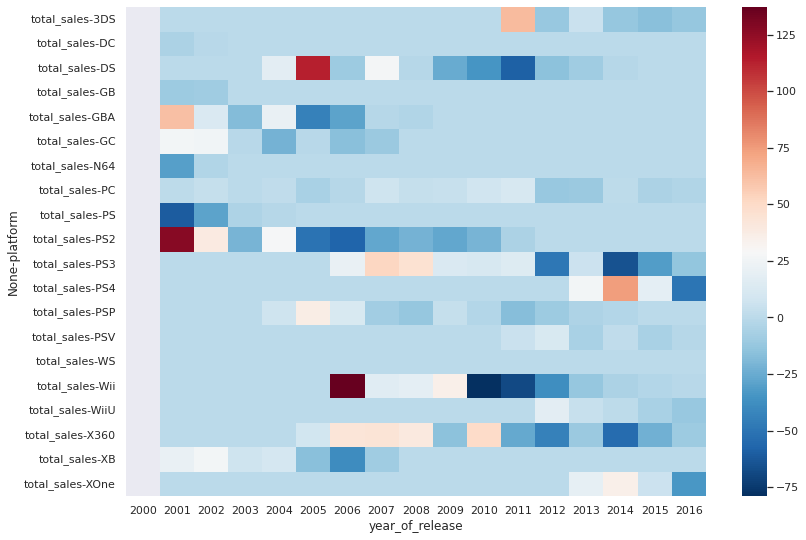

In [65]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics, cmap='RdBu_r');

On the heatmap from 2000 year it became clear that the total leader PS2 had huge sales but in 2000 and by the 2011 it had already 0 sales, the same lifecircle was for DS and Wii, they were spectacular in 2005 and 2006 respectively but in 2012 /2013 they completely died. As we need to prognose the 2017 campaign we can't use these years and platforms anymore so we should make the new data with games sold starting from 2013.

In [66]:
new_games_2013 = games_data[games_data['year_of_release']>=2013]
new_games_2013

name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3             2013        Action   
23                Grand Theft Auto V     X360             2013        Action   
31         Call of Duty: Black Ops 3      PS4             2015       Shooter   
33               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42                Grand Theft Auto V      PS4             2014        Action   
...                              ...      ...              ...           ...   
16703               Strawberry Nauts      PSV             2016     Adventure   
16707               Aiyoku no Eustia      PSV             2014          Misc   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16         7.02      9.09      0.98         3.96          97.0         8.2   
23         9.66      5.14      0.06         1.41          97.0         8.1   
31         6.03      5.86      0.36         2.38           NaN         NaN   
33         5.28      4.19      4.35         0.78           NaN         NaN   
42         3.96      6.31      0.38         1.97          97.0         8.3   
...         ...       ...       ...          ...           ...         ...   
16703      0.00      0.00      0.01         0.00           NaN         NaN   
16707      0.00      0.00      0.01         0.00           NaN         NaN   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  total_sales  
16           M        21.05  
23           M        16.27  
31     unknown        14.63  
33     unknown        14.60  
42           M        12.62  
...        ...          ...  
16703  unknown         0.01  
16707  unknown         0.01  
16710  unknown         0.01  
16712  unknown         0.01  
16714  unknown         0.01  

[2233 rows x 12 columns]

In [67]:
df_2013 = pd.pivot_table(new_games_2013,index=['year_of_release'], columns = ['platform'], values = ['total_sales'], aggfunc='sum', fill_value=0)
df_2013.head()

total_sales                                                  \
platform                3DS    DS     PC     PS3     PS4   PSP    PSV   Wii   
year_of_release                                                               
2013                  56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59   
2014                  43.76  0.00  13.28   47.76  100.00  0.24  11.90  3.75   
2015                  27.78  0.00   8.52   16.82  118.90  0.12   6.25  1.14   
2016                  15.14  0.00   5.25    3.60   69.25  0.00   4.25  0.18   

                                      
platform          WiiU   X360   XOne  
year_of_release                       
2013             21.65  88.58  18.96  
2014             22.03  34.74  54.07  
2015             16.35  11.96  60.14  
2016              4.60   1.52  26.15

In [68]:
dynamics_2013=(df_2013 -df_2013 .shift(+1)).T
dynamics_2013

year_of_release       2013   2014   2015   2016
            platform                           
total_sales 3DS        NaN -12.81 -15.98 -12.64
            DS         NaN  -1.54   0.00   0.00
            PC         NaN   0.90  -4.76  -3.27
            PS3        NaN -65.49 -30.94 -13.22
            PS4        NaN  74.01  18.90 -49.65
            PSP        NaN  -2.90  -0.12  -0.12
            PSV        NaN   1.31  -5.65  -2.00
            Wii        NaN  -4.84  -2.61  -0.96
            WiiU       NaN   0.38  -5.68 -11.75
            X360       NaN -53.84 -22.78 -10.44
            XOne       NaN  35.11   6.07 -33.99

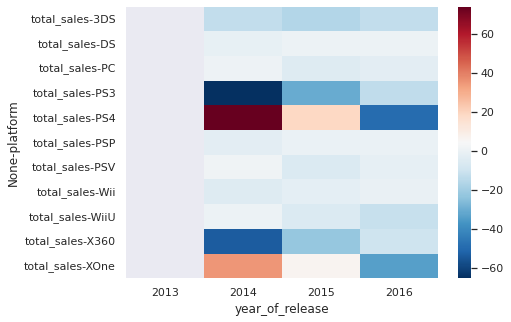

In [69]:
plt.figure(figsize=(7,5))
sns.heatmap(dynamics_2013, cmap='RdBu_r');

Here we see on our new heatmap from 2013 that there are some leaders that we can use for analysis, for example Xone and PS4 are still alive and had good sales in 2014

## Total_sales analysis of each game on the popular platforms

Currently we are going to look through total sales of the games on the different platforms.

In [70]:
games_grouped=new_games_2013.groupby(['platform','name'])['total_sales'].sum().reset_index()
games_grouped.sort_values(by='total_sales')

platform                                               name  total_sales
1116      PS4                  Rocksmith 2014 Edition Remastered         0.01
1466      PSV                         Kamigami no Asobi InFinite         0.01
1455      PSV                 Infinite Stratos 2: Love and Purge         0.01
751       PS3  Shin Koihime Musou: Otome Taisen * Sangokushi ...         0.01
1442      PSV                                       Hyakka Yakou         0.01
...       ...                                                ...          ...
980       PS4                                 Grand Theft Auto V        12.62
206       3DS                                Pokemon X/Pokemon Y        14.60
891       PS4                          Call of Duty: Black Ops 3        14.63
1868     X360                                 Grand Theft Auto V        16.27
607       PS3                                 Grand Theft Auto V        21.05

[2233 rows x 3 columns]

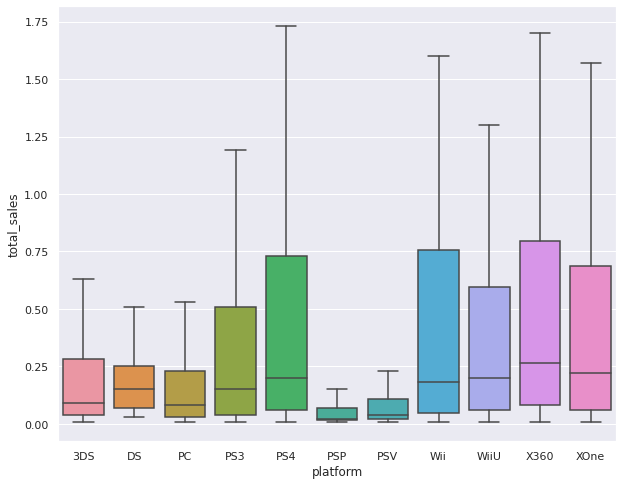

In [71]:
plt.figure(figsize=(10,8))
sns.boxplot(data=games_grouped, x='platform',y='total_sales',showfliers = False);

Connecting to games sales by platform, it is showm in the boxplot that the most profitable platforms starting from 2013 were X360, PS4, XOne and Wii. For PS4, X360 and PS3 we have more outliers. We also see that PSP , PSV and DS platforms have really small sales.

As we still have missing values for critic score and user score , to make an analysis of the affect of the scores for the sales for one popular platform, we need to make a clean data without these missing values.

In [72]:
data_clean_scores = new_games_2013.dropna(subset=['critic_score'])

In [73]:
data_clean_scores = new_games_2013.dropna(subset=['user_score'])

In [74]:
data_clean_scores.head()

name platform  year_of_release    genre  na_sales  \
16    Grand Theft Auto V      PS3             2013   Action      7.02   
23    Grand Theft Auto V     X360             2013   Action      9.66   
42    Grand Theft Auto V      PS4             2014   Action      3.96   
60  Call of Duty: Ghosts     X360             2013  Shooter      6.73   
69  Call of Duty: Ghosts      PS3             2013  Shooter      4.10   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
16      9.09      0.98         3.96          97.0         8.2      M   
23      5.14      0.06         1.41          97.0         8.1      M   
42      6.31      0.38         1.97          97.0         8.3      M   
60      2.56      0.04         0.91          73.0         2.6      M   
69      3.63      0.38         1.25          71.0         2.6      M   

    total_sales  
16        21.05  
23        16.27  
42        12.62  
60        10.24  
69         9.36

I'll make a function to analyze the correlation of score type for popular platforms and to built scatterplot.

In [75]:
def score_effect(platform, score_type):
    fig, ax = plt.subplots(figsize=(8,7))
    sns.scatterplot(x="total_sales", y=score_type, data=data_clean_scores[data_clean_scores['platform'] == platform])
    plt.show()
    corr = stats.pearsonr(data_clean_scores[score_type], data_clean_scores['total_sales'])[0]
    if corr >0.7:
        correlation = 'Positive between this score and sales'
    else:
        correlation = 'No correlation between this score and sales'
        print(correlation)

First I'll take the platform X360 and the affect of user and critic score. 

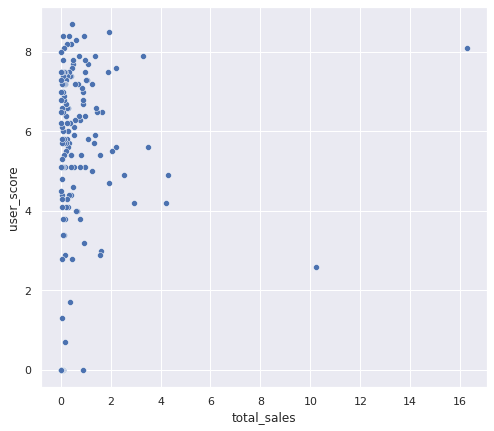

No correlation between this score and sales


In [76]:
score_effect('X360', 'user_score')

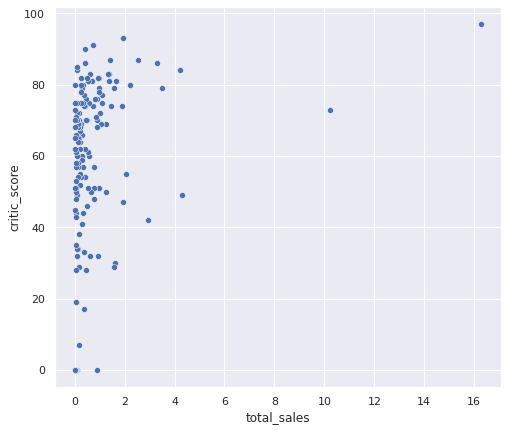

No correlation between this score and sales


In [77]:
score_effect('X360', 'critic_score')

On the scatterplot above it is shown that there is no correlation between sales and user_scores and critic_scores for X360 platform.

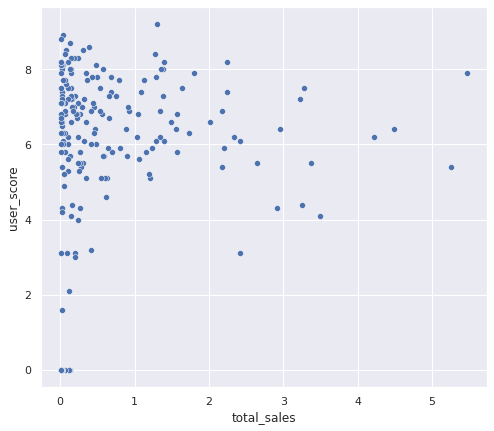

No correlation between this score and sales


In [78]:
score_effect('XOne', 'user_score')

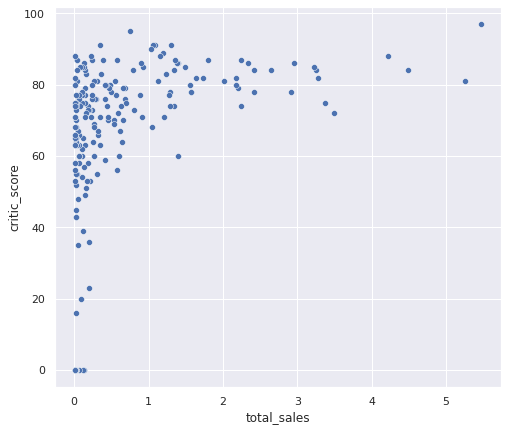

No correlation between this score and sales


In [79]:
score_effect('XOne', 'critic_score')

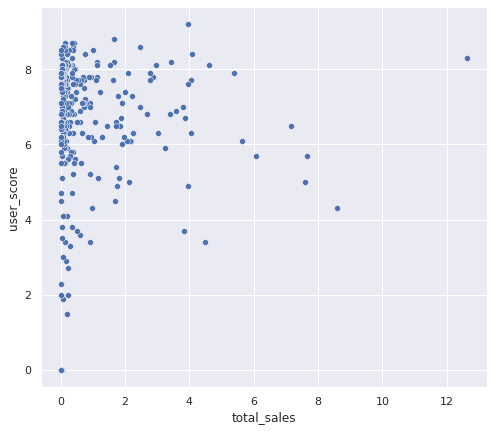

No correlation between this score and sales


In [80]:
score_effect('PS4', 'user_score')

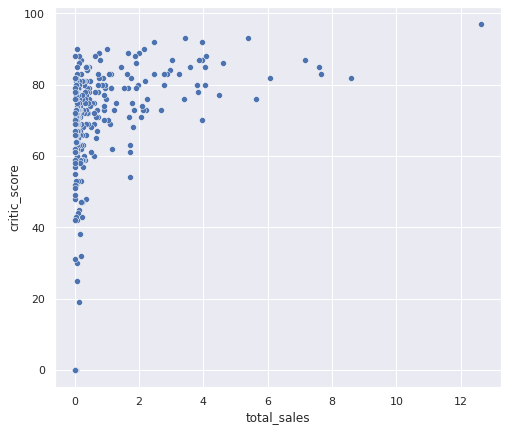

No correlation between this score and sales


In [81]:
score_effect('PS4', 'critic_score')

As for X360, XOne and PS4 there is no correaltion between score and sales. There is a little bit more affect of critic score to PS4, but this correlation is not strong.

In [82]:
genres_grouped=new_games_2013.groupby('genre')['total_sales'].sum().reset_index()
genres_grouped.sort_values(by='total_sales',ascending=False).head()

genre  total_sales
0         Action       321.87
8        Shooter       232.98
10        Sports       150.65
7   Role-Playing       145.89
3           Misc        62.82

In [83]:
genres_grouped.sort_values(by='total_sales',ascending=False).tail()

genre  total_sales
2     Fighting        35.31
1    Adventure        23.64
9   Simulation        21.76
11    Strategy        10.08
5       Puzzle         3.17

The most profitable genres sold are action and shooter, the less sales were brought by puzzle games and strategy.

Now we are going to make a user profile for each region and to check the top five platforms, top five genres, and the effect of rating to sales in every region.

Let's start from NA region.

In [84]:
na_top_platforms = new_games_2013.groupby('platform')['na_sales'].sum().reset_index()
top_five_na = na_top_platforms.sort_values(by='na_sales',ascending=False).head()

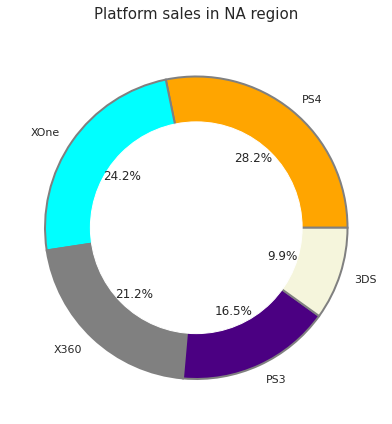

In [85]:
fig = plt.figure(figsize =(8, 6))
colors = ( "orange", "cyan",
          "grey", "indigo", "beige")
wp = { 'linewidth' : 2, 'edgecolor' : "grey" }
plt.pie(top_five_na['na_sales'], labels = top_five_na['platform'], colors=colors, wedgeprops = wp,autopct='%1.1f%%')
fig.suptitle('Platform sales in NA region', fontsize=15)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show();

For the north american region the platforms that are the most request are - PS4(28.2%), Xone(24,2%) and X360(21.2%)

In [86]:
na_top_genres = new_games_2013.groupby('genre')['na_sales'].sum().reset_index()
top_genres_na = na_top_genres.sort_values(by='na_sales',ascending=False).head()
top_genres_na

genre  na_sales
0         Action    126.05
8        Shooter    109.74
10        Sports     65.27
7   Role-Playing     46.40
3           Misc     27.49

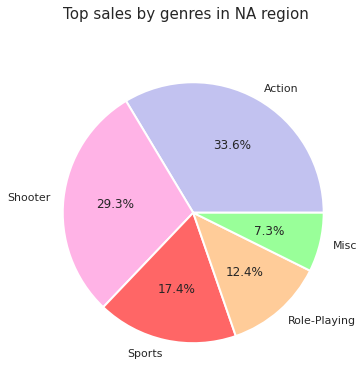

In [87]:
fig = plt.figure(figsize =(8, 6))
colors = ( '#c2c2f0','#ffb3e6',
          '#ff6666', '#ffcc99', '#99ff99')
wp = { 'linewidth' : 2, 'edgecolor' : "white" }
plt.pie(top_genres_na['na_sales'], labels = top_genres_na['genre'], colors=colors, wedgeprops = wp,autopct='%1.1f%%')
fig.suptitle('Top sales by genres in NA region', fontsize=15)

plt.show();

In the north American region the top 5 leaders are action, shooter, sports, role playing and then misc. And we see that the share of action and shooter is more than 50% in the sum. The others are not that popular.

In [88]:
na_ratings = new_games_2013.groupby('rating')['na_sales'].median().reset_index().sort_values(by='na_sales',ascending=False).head()
na_ratings

rating  na_sales
2     EC     0.140
4      M     0.080
0      E     0.050
1   E10+     0.050
5      T     0.045

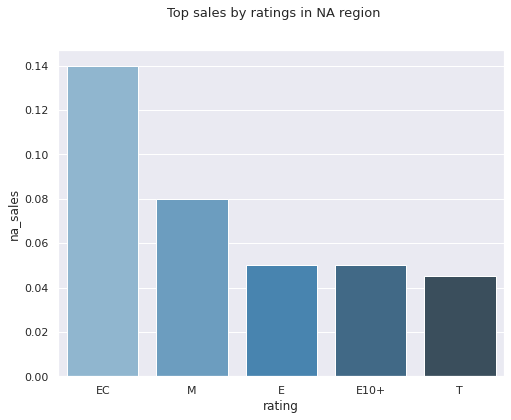

In [89]:
from numpy import median
fig = plt.figure(figsize =(8, 6))
fig.suptitle('Top sales by ratings in NA region', fontsize=13)
ax = sns.barplot(x="rating", y="na_sales", data=na_ratings, estimator=median,palette="Blues_d")

The top sales in the north america are for games with the EC and M ratings. Let's take a look at the European region.

In [90]:
eu_top_platforms = new_games_2013.groupby('platform')['eu_sales'].sum().reset_index()
eu_top5_platforms = eu_top_platforms.sort_values(by='eu_sales',ascending=False).head()
eu_top5_platforms 

platform  eu_sales
4       PS4    141.09
3       PS3     67.81
10     XOne     51.59
9      X360     42.52
0       3DS     30.96

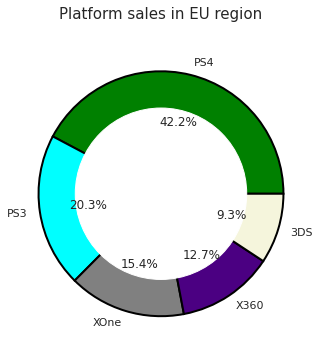

In [91]:
fig = plt.figure(figsize =(7, 5))
colors = ( "green", "cyan",
          "grey", "indigo", "beige")
wp = { 'linewidth' : 2, 'edgecolor' : "black" }
plt.pie(eu_top5_platforms ['eu_sales'], labels = eu_top5_platforms['platform'], colors=colors, wedgeprops = wp,autopct='%1.1f%%')
fig.suptitle('Platform sales in EU region', fontsize=15)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show();

In the european region the 2 most popular platforms are PS4( 42,2%) and PS3(20,3%) the others are Xone, X360 and 3DS

In [92]:
eu_top_genres = new_games_2013.groupby('genre')['eu_sales'].sum().reset_index()
eu_top5_genres = eu_top_genres.sort_values(by='eu_sales',ascending=False).head()
eu_top5_genres

genre  eu_sales
0         Action    118.13
8        Shooter     87.86
10        Sports     60.52
7   Role-Playing     36.97
6         Racing     20.19

The distribution of the popular genres are mostly equal to NA region but the last popular one is Racing, not misc

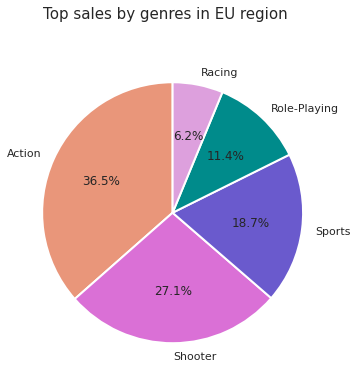

In [93]:
fig = plt.figure(figsize =(8, 6))
colors = ( 'darksalmon','orchid',
          'slateblue', 'darkcyan', 'plum')
wp = { 'linewidth' : 2, 'edgecolor' : "white" }
plt.pie(eu_top5_genres['eu_sales'], labels = eu_top5_genres['genre'], colors=colors, wedgeprops = wp,autopct='%1.1f%%',startangle=90)
fig.suptitle('Top sales by genres in EU region', fontsize=15)

plt.show();

In [94]:
eu_ratings = new_games_2013.groupby('rating')['eu_sales'].median().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_ratings

rating  eu_sales
4      M      0.08
0      E      0.05
1   E10+      0.05
2     EC      0.04
5      T      0.04

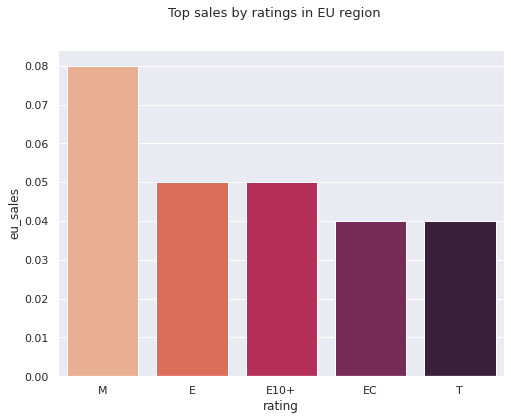

In [95]:
from numpy import median
fig = plt.figure(figsize =(8, 6))
fig.suptitle('Top sales by ratings in EU region', fontsize=13)
ax = sns.barplot(x="rating", y="eu_sales", data= eu_ratings, estimator=median, palette ="rocket_r")


The top games sold by ratings are M and E, and the EC is less popular than in NA region

In [96]:
jp_top_platforms = new_games_2013.groupby('platform')['jp_sales'].sum().reset_index()
jp_top5_platforms = jp_top_platforms.sort_values(by='jp_sales',ascending=False).head()
jp_top5_platforms

platform  jp_sales
0      3DS     67.81
3      PS3     23.35
6      PSV     18.59
4      PS4     15.96
8     WiiU     10.88

In Japan we see a different shares for popular platforms , the most profitable one is 3DS and we see a WiiU in this chart of popularity and we didn't see this platform among popular in other regions

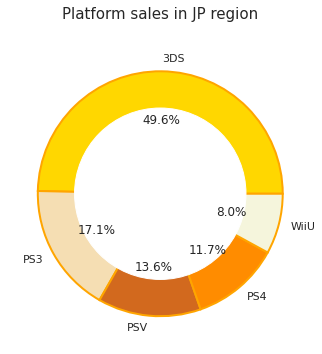

In [97]:
fig = plt.figure(figsize =(7, 5))
colors = ( "gold", "wheat",
          "chocolate", "darkorange", "beige")
wp = { 'linewidth' : 2, 'edgecolor' : "orange" }
plt.pie(jp_top5_platforms ['jp_sales'], labels = jp_top5_platforms['platform'], colors=colors, wedgeprops = wp,autopct='%1.1f%%')
fig.suptitle('Platform sales in JP region', fontsize=15)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show();

In [98]:
jp_top_genres = new_games_2013.groupby('genre')['jp_sales'].sum().reset_index()
jp_top5_genres = jp_top_genres.sort_values(by='jp_sales',ascending=False).head()
jp_top5_genres

genre  jp_sales
7  Role-Playing     51.04
0        Action     40.49
3          Misc      9.20
2      Fighting      7.65
8       Shooter      6.61

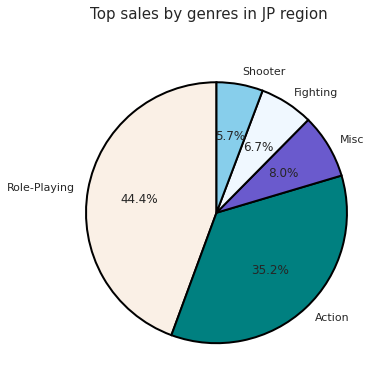

In [99]:
fig = plt.figure(figsize =(8, 6))
colors = ( 'linen','teal',
          'slateblue', 'aliceblue', 'skyblue')
wp = { 'linewidth' : 2, 'edgecolor' : "black" }
plt.pie(jp_top5_genres['jp_sales'], labels = jp_top5_genres['genre'], colors=colors, wedgeprops = wp,autopct='%1.1f%%',startangle=90)
fig.suptitle('Top sales by genres in JP region', fontsize=15)

plt.show();

Due to the cultural differences there is obviously different picture in the japan region. The role playing is the most popular, the the action, Misc,fighting and shooter have the similar but realy small amounts there.

In [100]:
jp_ratings = new_games_2013.groupby('rating')['jp_sales'].median().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_ratings

rating  jp_sales
4      M      0.02
0      E      0.01
1   E10+      0.01
3    K-A      0.01
5      T      0.01

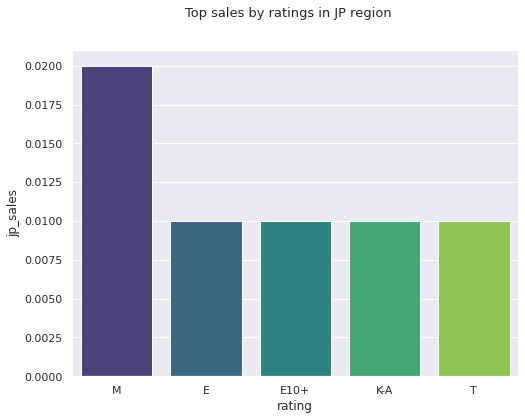

In [101]:
from numpy import median
fig = plt.figure(figsize =(8, 6))
fig.suptitle('Top sales by ratings in JP region', fontsize=13)
ax = sns.barplot(x="rating", y="jp_sales", data= jp_ratings, estimator=median, palette ="viridis")


We see that the M(older than 17) is the most popular and we don't see here games with rating EC (early childhood from 3+), that's mean that the children of that age are rarely playing games in that region


## Now let's move to the last step and test the hypotheses:
 
—Average user ratings of the Xbox One and PC platforms are the same.
—Average user ratings for the Action and Sports genres are different.
    
    We consider that the null hypothesis is effectively stating that a difference between comparing situation is equal to zero, that the 2 parameteres that we are comparing are equal. That's how I chose the H0 and the H1

In [102]:
data_clean_scores.groupby(['platform'])['user_score'].median()

platform
3DS     6.80
DS      0.00
PC      6.80
PS3     6.40
PS4     7.00
PSP     5.85
PSV     7.70
Wii     0.00
WiiU    7.10
X360    6.10
XOne    6.60
Name: user_score, dtype: float64

In [103]:
XOne_data=data_clean_scores.query('platform=="XOne"')

In [104]:
PC_data=data_clean_scores.query('platform=="PC"')

In [105]:
sample1=XOne_data['user_score']

In [106]:
sample2=PC_data['user_score']

In [107]:
p_value = stats.ttest_ind(sample1, sample2)
p_value

Ttest_indResult(statistic=0.3397711525695877, pvalue=0.7342309439997148)

In [108]:
p_value = stats.ttest_ind(sample1, sample2).pvalue
p_value

0.7342309439997148

In [109]:
p_value = p_value.astype(int)
alpha=0.05
if p_value<alpha:
    print('Reject H0: Average user ratings of the Xbox One and PC platforms are the same')
else:
    print('Fail to reject H0: We do not have enough evidences to say the average sample 1 and sample 2 are not the same')

Reject H0: Average user ratings of the Xbox One and PC platforms are the same


H0 = "Average user ratings for the Action and Sports genres are the same"

H1 = "Average user ratings for the Action and Sports genres are different"

In [110]:
data_clean_scores.groupby(['genre'])['user_score'].median()

genre
Action          7.00
Adventure       7.45
Fighting        7.45
Misc            6.80
Platform        6.50
Puzzle          6.30
Racing          6.20
Role-Playing    7.60
Shooter         6.40
Simulation      6.10
Sports          5.40
Strategy        7.10
Name: user_score, dtype: float64

In [111]:
action_data=data_clean_scores.query('genre=="Action"')

In [112]:
sports_data=data_clean_scores.query('genre=="Sports"')

In [113]:
sample1=action_data['user_score']

In [114]:
sample2=sports_data['user_score']

In [115]:
p_value = stats.ttest_ind(sample1, sample2)
p_value

Ttest_indResult(statistic=6.218940744513402, pvalue=9.347062339997114e-10)

In [116]:
p_value = stats.ttest_ind(sample1, sample2).pvalue
p_value

9.347062339997114e-10

In [117]:
p_value = p_value.astype(int)
alpha=0.05
if p_value<alpha:
    print('Reject H0: Average user ratings of the Action and Sports genres are the same')
else:
    print('Fail to reject H0: We do not have enough evidences to say the average sample 1 and sample 2 are not the same')

Reject H0: Average user ratings of the Action and Sports genres are the same


# Conclusion
We've studied the whole data and got to know that there is a life span of the gaming platforms and even the most profitable and popular one (for ex, PS2) have the life about 3 or 4 years, when the sales are increasing and then they start to fail. To make a campaign for 2017 we should take the platforms that are still alive and have profitable sales (as we saw on the graphs that were XOne, PS4 and X360 platforms) According to the popular genres in different regions, there are differences in NA,EU and JP regions. As we saw the most on demand in the NA region are action and shooter, but the Racing is popular in EU regions. In the JP region there is a different distribution - for example, the role play is actualy the leader and than the action, as for shooter there are on the last place among the top 5. Also we notice that there are really young players in the north american region (3+) and there are some of them in European, but no such players among the Japanese site. To add more we also see that there is no correlation between scores and the sales. So probably we should direct our efforts to proceed with these popular genres and the most popular ages in different regions 
